## Load Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#custom palette
colors = ["#66C8D5","#00478E", "#E1EAA7",  "#84A266", "#F25C5C"]
sns.set_palette(sns.color_palette(colors))

In [18]:
pd.read_csv?

In [2]:
df = pd.read_csv("Dataset/international_matches.csv", parse_dates = ['date'])

df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Analysis 

FIFA updates the ranking of teams multiple times a year based on the team's performance in matches. Each team is awarded a certain number of points based on wheteher the won or drawn, the importance of the match and the strength of the opposing team. The overall number of points determines the FIFA rank of the team.

If we want to know the most recent rank of the team, we must focus on the most recent game each team played...


### What are the 10 strongest teams?

In [3]:
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date', 'home_team','home_team_fifa_rank']].rename(columns = {'home_team': 'top_team', 'home_team_fifa_rank' : 'top_rank'})
away = fifa_rank[['date', 'away_team','away_team_fifa_rank']].rename(columns = {'away_team': 'top_team', 'away_team_fifa_rank' : 'top_rank'})
fifa_rank = home.append(away)

#select for each country the latest match
fifa_rank  = fifa_rank.sort_values(['top_team', 'date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('top_team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'top_rank')

#let's see the 10 strongest teams
fifa_rank_top

C:\Users\prava\AppData\Local\Temp\ipykernel_10676\2045936392.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_rank = home.append(away)


,date,top_team,top_rank
23760,2022-06-06,Brazil,1
23909,2022-06-14,Belgium,2
23885,2022-06-13,France,3
23741,2022-06-05,Argentina,4
23906,2022-06-14,England,5
23907,2022-06-14,Italy,6
23866,2022-06-12,Spain,7
23867,2022-06-12,Portugal,8
23903,2022-06-14,Mexico,9
23908,2022-06-14,Netherlands,10


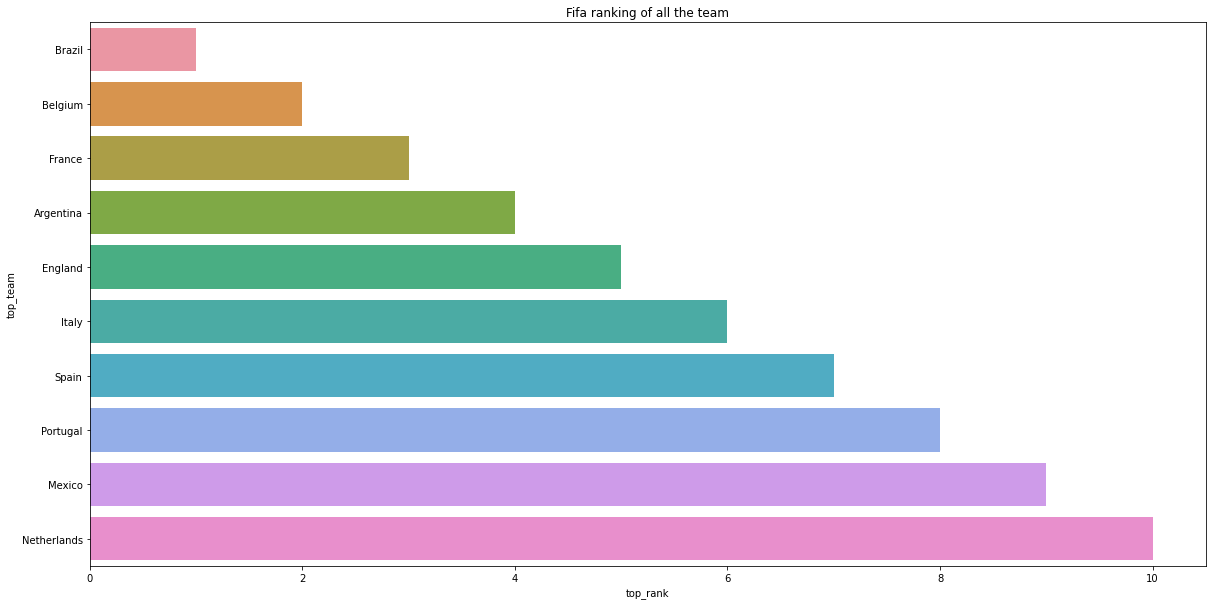

In [4]:
plt.figure(figsize=(20,10))
plt.title("Fifa ranking of all the team")
sns.barplot(data=fifa_rank_top, x='top_rank', y='top_team')
plt.show()

<img src = "Image/brazil_team.png" >

    
 As we can see the brazil team is the highest ranking team in the table  

# Now finding the top 10 team which have the strongest _offense, defense and midfield_ teams

It is often said that the most important position in soccer is the striker. Without the striker, the team would score fewer goals which reduces the chances of the team winning the match.

In [5]:
#let's re-shape the data a bit
offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = offense [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
offense  = home.append(away)

#select for each country the latest match
offense   = offense .sort_values(['team', 'date'], ascending=[True, False])
offense ['row_number'] = offense .groupby('team').cumcount()+1
offense_top = offense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'offense_score')

# Let's see the top 10 strongest offense team
offense_top

C:\Users\prava\AppData\Local\Temp\ipykernel_10676\31575069.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  offense  = home.append(away)


,date,team,offense_score
23741,2022-06-05,Argentina,89.0
23885,2022-06-13,France,88.3
23906,2022-06-14,England,88.0
23760,2022-06-06,Brazil,86.3
23867,2022-06-12,Portugal,86.0
23909,2022-06-14,Belgium,85.7
23907,2022-06-14,Italy,85.3
23866,2022-06-12,Spain,85.0
23909,2022-06-14,Poland,84.7
23862,2022-06-11,Uruguay,84.3


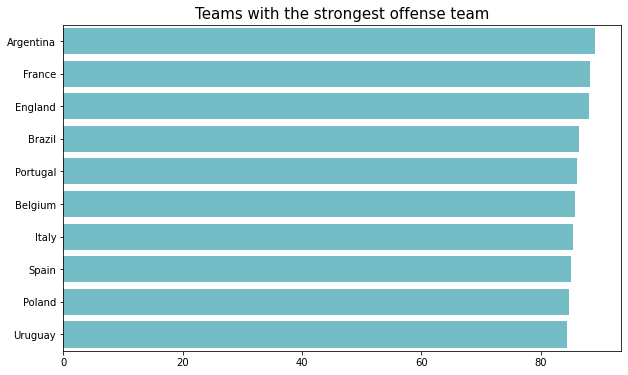

In [6]:
#plot the teams with the strongest offense players
fig, axes = plt.subplots(1,1,  figsize=(10, 6))
ax = sns.barplot(data = offense_top, y = 'team', x = 'offense_score', orientation = 'horizontal', color = "#66C8D5")
ax.set_title ('Teams with the strongest offense team', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

<img src = 'Image/argentina_team.png' >

In [7]:
defense = df[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home = defense [['date', 'home_team','home_team_mean_defense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_defense_score' : 'defense_score'})
away = defense [['date', 'away_team','away_team_mean_defense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_defense_score' : 'defense_score'})
defense  = home.append(away)
# offense
#last match that each country played
defense   = defense .sort_values(['team', 'date'], ascending=[True, False])
defense ['row_number'] = defense .groupby('team').cumcount()+1
defense_top = defense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'defense_score')

# Let's see top 10 strongest defense team
defense_top

C:\Users\prava\AppData\Local\Temp\ipykernel_10676\4285243958.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  defense  = home.append(away)


,date,team,defense_score
23866,2022-06-12,Spain,86.5
23908,2022-06-14,Netherlands,85.2
23867,2022-06-12,Portugal,85.2
23906,2022-06-14,England,85.0
23760,2022-06-06,Brazil,84.8
23885,2022-06-13,France,84.2
23907,2022-06-14,Italy,84.2
23907,2022-06-14,Germany,84.0
23741,2022-06-05,Argentina,82.2
23879,2022-06-13,Morocco,81.2


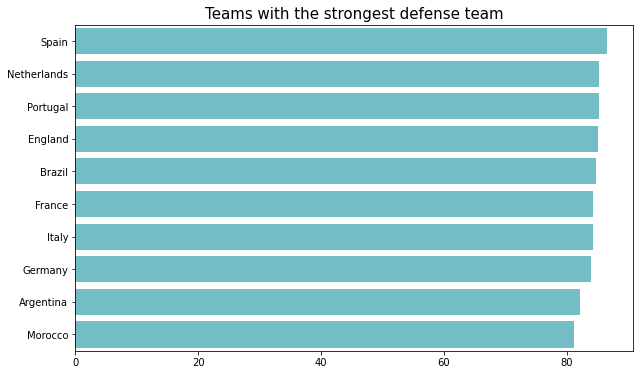

In [8]:
#plot the teams with the strongest defense players
fig, axes = plt.subplots(1,1,  figsize=(10, 6))
ax = sns.barplot(data = defense_top, y = 'team', x = 'defense_score', orientation = 'horizontal', color = "#66C8D5")
ax.set_title ('Teams with the strongest defense team', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

<img src = 'Image/spain_team.png' >

In [14]:
midfiled = df[['date', 'home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home = midfiled [['date', 'home_team','home_team_mean_midfield_score']].rename(columns = {'home_team': 'team', 'home_team_mean_midfield_score' : 'midfield_score'})
away = midfiled [['date', 'away_team','away_team_mean_midfield_score']].rename(columns = {'away_team': 'team', 'away_team_mean_midfield_score' : 'midfield_score'})
midfiled  = home.append(away)
# offense
#last match that each country played
midfiled   = midfiled .sort_values(['team', 'date'], ascending=[True, False])
midfiled ['row_number'] = defense .groupby('team').cumcount()+1
midfield_top = midfiled [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'midfield_score')

# Lets's see the top 10 strongest midfiled team
midfield_top

C:\Users\prava\AppData\Local\Temp\ipykernel_10676\2240408211.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  midfiled  = home.append(away)


,date,team,midfield_score
23907,2022-06-14,Germany,87.8
23885,2022-06-13,France,86.8
23866,2022-06-12,Spain,86.0
23909,2022-06-14,Belgium,85.5
23760,2022-06-06,Brazil,85.5
23907,2022-06-14,Italy,84.5
23867,2022-06-12,Portugal,84.5
23885,2022-06-13,Croatia,84.2
23741,2022-06-05,Argentina,84.0
23906,2022-06-14,England,84.0


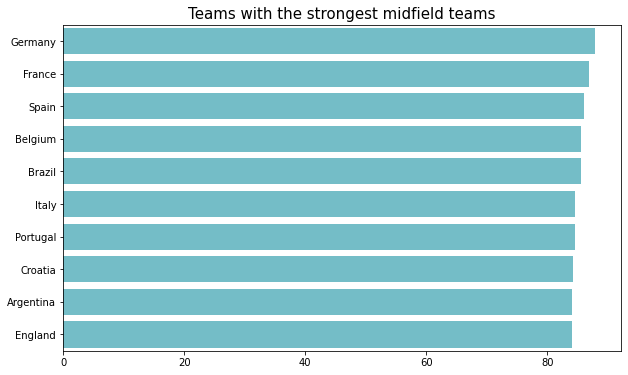

In [15]:
#plot the teams with the strongest midfield players
fig, axes = plt.subplots(1,1,  figsize=(10, 6))
ax = sns.barplot(data = midfield_top, y = 'team', x = 'midfield_score', orientation = 'horizontal', color = "#66C8D5")
ax.set_title ('Teams with the strongest midfield teams', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

<img src = 'Image/germany_team.png' >

## How well does the strength of both teams correlate with the result of the match?

In [ ]:
#lets create some new features 

#numerical column for match result
df['match_result'] = np.where(df['home_team_result']=='Win', 2, 
                         np.where(df['home_team_result']=='Draw', 1, 0))

#fifa rank delta of home and away team (higher values indicate that home team is stronger than away team)
df['fifa_rank_delta'] = df['away_team_fifa_rank'] - df ['home_team_fifa_rank']

#offense home team vs defense away team (higher values indicate that home team offense is stronger than away team defense)
df['offense/defense_ratio'] = df['home_team_mean_offense_score'] / df['away_team_mean_defense_score']

C:\Users\prava\AppData\Local\Temp\ipykernel_10676\3911243426.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mean = df.drop(['home_team_total_fifa_points', 'away_team_total_fifa_points', 'neutral_location'],axis=1).corr(method = 'pearson')


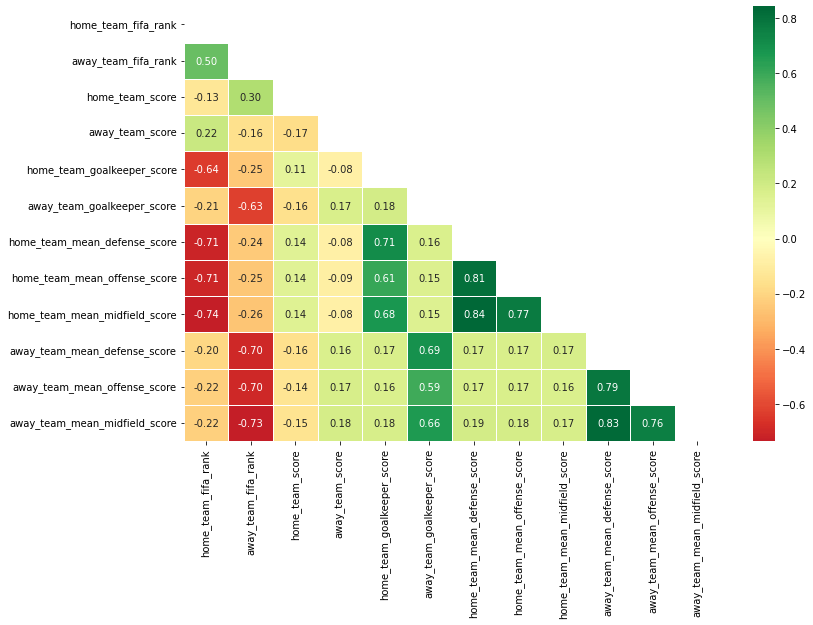

In [16]:
# Create the correlation matrix
corr_mean = df.drop(['home_team_total_fifa_points', 'away_team_total_fifa_points', 'neutral_location'],axis=1).corr(method = 'pearson')

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(12,8)) 
ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# ax.set_yticklabels(ax.get_xticklabels(), rotation=45)
plt.show()